# Use Random Forest for regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None) # afficher toutes les colonnes

In [3]:
data = pd.read_csv("car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [8]:
# object types of value

print(data.Seller_Type.unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())
print(data.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [9]:
# check missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
df = data[['Year' , 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [16]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [17]:
# on va retirer les années pour les remplacer par le nombres d'années en fonction de l'année en cours

df["Current_Year"]=2020

In [18]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [19]:
df["Number_of_years"] = df["Current_Year"] - df["Year"]

In [21]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [23]:
df = df.drop(['Year' , 'Current_Year'] , axis=1)

In [24]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [26]:
df = pd.get_dummies(df,drop_first=True)

In [27]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [31]:
print(df.Seller_Type_Individual.unique())
print(df['Transmission_Manual'].unique())
print(df['Owner'].unique())
print(df.Fuel_Type_Diesel.unique())

[0 1]
[1 0]
[0 1 3]
[0 1]


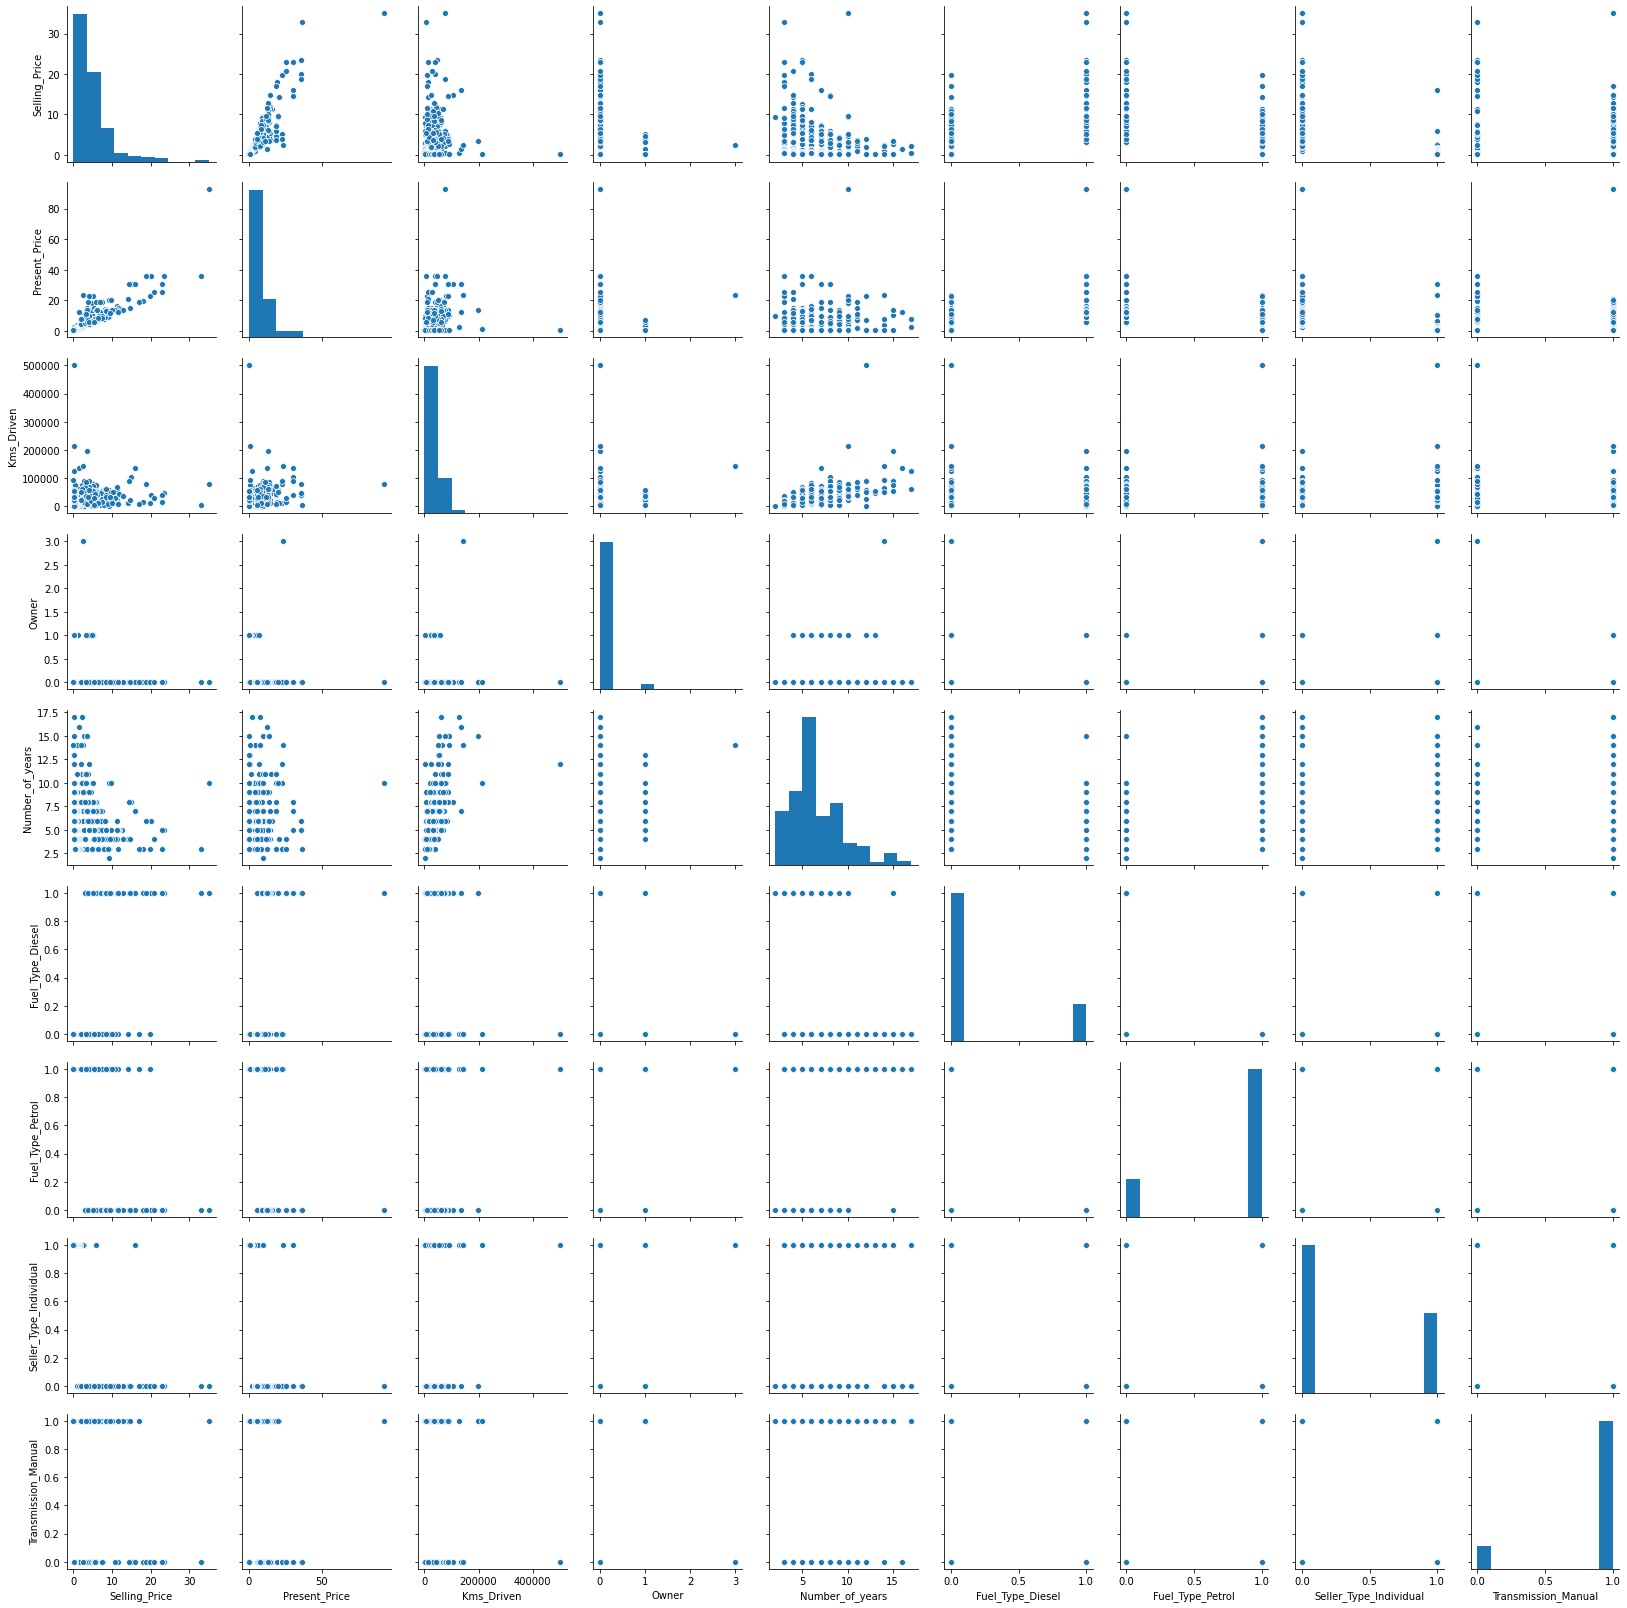

In [33]:
# seaborn 
sns.pairplot(df)

In [38]:
corrmat = df.corr()

In [39]:
corrmat

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [36]:
top_corr_features = corrmat.index

In [37]:
top_corr_features

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

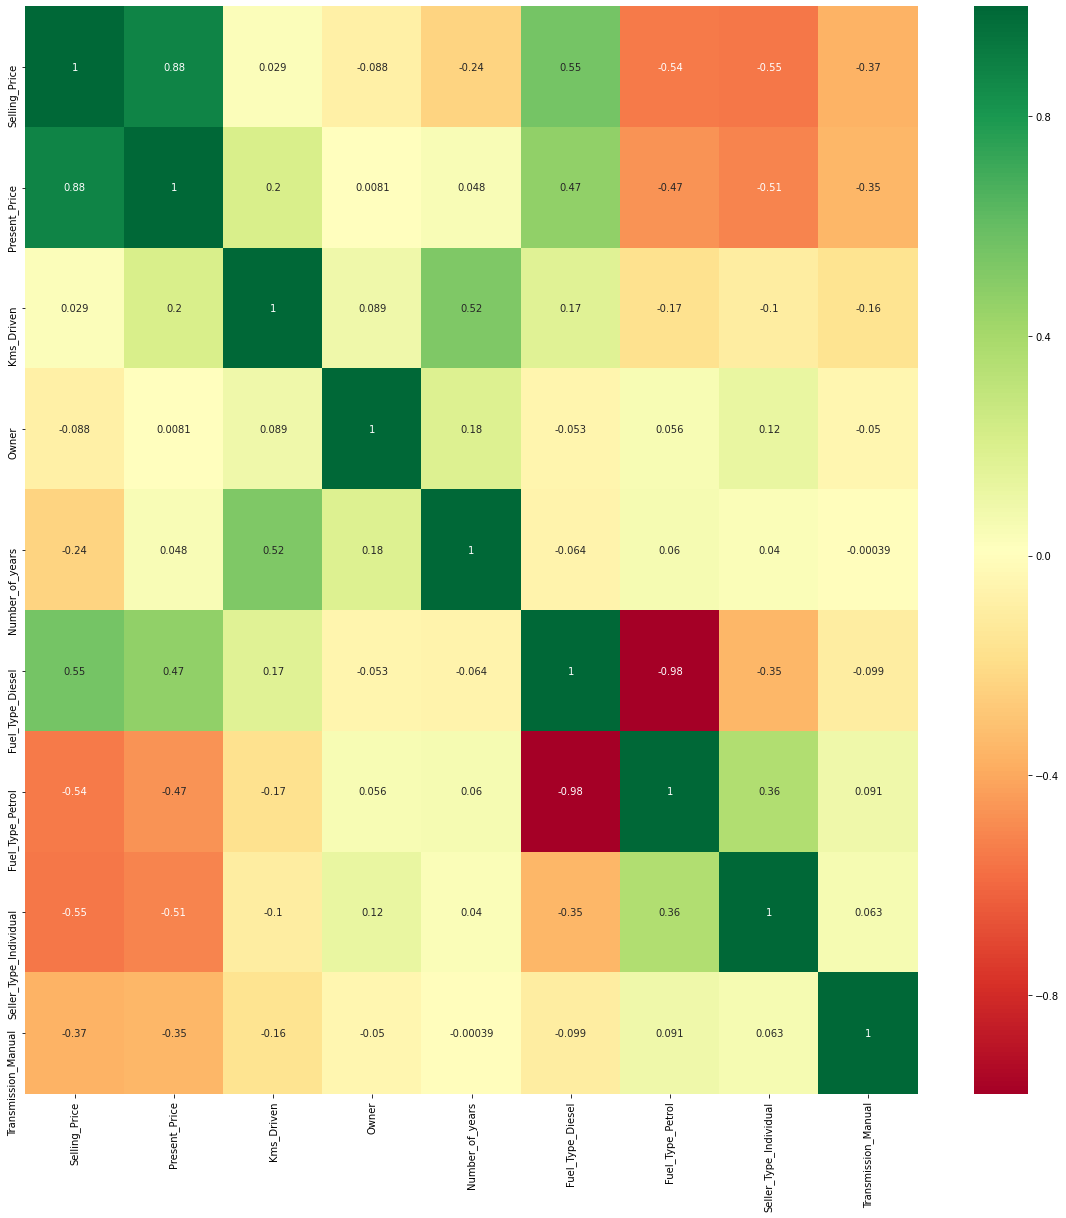

In [44]:
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr() , annot=True , cmap='RdYlGn')


In [45]:
# target and features ( independant and dependant)
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [46]:
X

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,4,1,0,0,1
297,5.90,60000,0,5,0,1,0,1
298,11.00,87934,0,11,0,1,0,1
299,12.50,9000,0,3,1,0,0,1


In [47]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [51]:
### Feature importance ( ExtraTreesRegressor)
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

/Users/Mohsylla/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [52]:
print(model.feature_importances_)

[4.05844875e-01 4.30143585e-02 1.86595411e-04 8.25379882e-02
 1.85993615e-01 2.01714912e-02 1.41271324e-01 1.20979752e-01]


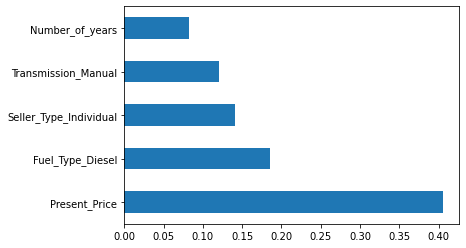

In [53]:
#plot for better visualisation feature importance
feat_importance = pd.Series(model.feature_importances_ , index=X.columns)
feat_importance.nlargest(5).plot(kind='barh') # top 5 des features importantes
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [55]:
X_train

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
17,10.79,43000,0,4,1,0,0,1
97,18.64,8700,0,3,0,1,0,1
36,7.20,48767,0,5,0,1,0,1
253,9.90,48000,0,6,1,0,0,1
177,0.57,24000,0,4,0,1,1,0
...,...,...,...,...,...,...,...,...
181,0.48,50000,0,4,0,1,1,1
166,0.55,1000,0,4,0,1,1,1
34,8.06,45000,0,6,1,0,0,1
266,7.00,35000,0,6,0,1,0,1


In [56]:
y_train

17      7.75
97     17.00
36      4.65
253     7.20
177     0.35
       ...  
181     0.30
166     0.45
34      5.50
266     3.65
213     2.90
Name: Selling_Price, Length: 240, dtype: float64

In [57]:
X_test

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
59,35.960,41000,0,6,1,0,0,0
137,0.787,16000,0,7,0,1,1,1
46,4.890,64532,0,7,0,1,0,1
65,6.950,45000,0,6,1,0,0,1
163,0.950,27000,0,10,0,1,1,1
...,...,...,...,...,...,...,...,...
194,0.787,50000,0,12,0,1,1,1
258,13.600,25000,0,5,0,1,0,1
147,0.840,58000,0,5,0,1,1,1
69,20.910,12000,0,4,0,1,0,1


In [58]:
y_test

59     19.99
137     0.65
46      2.65
65      4.75
163     0.45
       ...  
194     0.20
258     8.40
147     0.55
69     14.25
189     0.20
Name: Selling_Price, Length: 61, dtype: float64

In [59]:
# Model

from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()


In [62]:
### Hyperparameters ( model parameters)
n_estimators = [int(x) for x in np.linspace (start = 100 , stop = 1200 , num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [64]:
# Randomized Search CV

#Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace (start = 100 , stop = 1200 , num = 12)]

#Number of features to consider every split
max_features = ['auto' , 'sqrt']

#Maximum of level in Trees
max_depth = [int(x) for x in np.linspace (start = 5 , stop = 30 , num = 6)]

#max_depth.append(None) ..whyy

#Minimum number of samples required to split a node
min_samples_split = [2 , 5 , 10 , 15 , 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1 , 2 , 5 , 10]


In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# Create the random grid
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf 
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [73]:
# Use the Random Grid to search for best hyperparameters
# First create model to tune

rf = RandomForestRegressor()

In [74]:
rf_random = RandomizedSearchCV(estimator=rf , param_distributions = random_grid, scoring ='neg_mean_squared_error', n_iter = 10 , cv=5 , verbose = 2 , random_state = 42 , n_jobs = 1)

In [75]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   50.0s finished
/Users/Mohsylla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [81]:
# Predictions on model

prediction = rf_random.predict(X_test)

In [79]:
prediction

array([20.26729,  0.64032,  2.84288,  4.78365,  0.44005,  2.96495,
        7.0457 ,  0.48199,  5.64946,  0.53954,  0.48304,  4.57308,
        0.61302, 14.9203 ,  6.90862,  0.47422,  0.47011,  1.2179 ,
        0.60252, 15.29294,  8.4864 ,  4.83067,  8.54404,  1.03109,
        4.49792,  7.1621 ,  8.61434,  9.83712,  5.29445,  3.13338,
        0.48791,  2.5648 ,  5.13565,  0.97353,  1.13899,  0.68928,
        5.1786 ,  3.42487,  1.12151,  2.6355 , 10.02441,  4.1198 ,
        0.77492,  6.25864,  5.00938, 16.66101,  4.4163 ,  2.46561,
        3.98148,  0.28359,  0.29466,  0.6453 ,  0.77655, 22.11932,
       11.49703,  9.90751,  0.24033,  8.51474,  0.52361, 13.38468,
        0.2722 ])

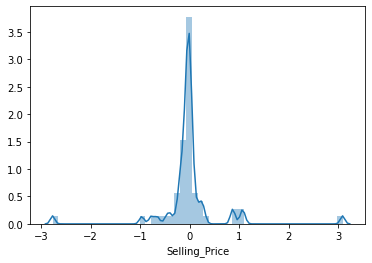

In [82]:
sns.distplot(y_test-prediction)
# good model because difference between y_test and prediction gives normal distribution

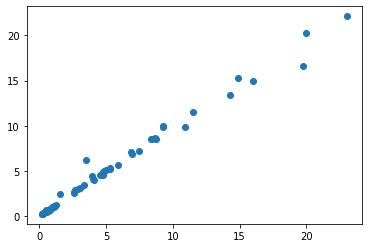

In [90]:
plt.scatter(y_test , prediction)